# Analyzing results of one experiment. In this notebook we analyze the following for DeepAR with best hyperparameters on Electricity.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100
num_timeseries = 321

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/electricity/8B'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

78it [00:00, 31372.81it/s]
100%|#############| 77/77 [04:40<00:00,  3.64s/it]


In [6]:
len(forcast_list1)

77

In [7]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2014-05-26 20:00:00,9.0,10.982723,15.265918,14.675426,12.490794,12.098587,8.901157,...,9.609876,12.819595,11.499594,6.836062,15.424452,9.569318,17.444174,14.965517,7.410717,14.175667
1,1,0,2014-05-26 21:00:00,10.0,2.676531,23.072605,15.415314,11.486424,18.045250,13.842045,...,3.623364,23.808558,19.575195,3.180364,5.543096,11.532989,22.047337,11.668881,12.567714,21.325066
2,1,0,2014-05-26 22:00:00,22.0,5.222621,13.265156,11.310377,11.811809,33.942005,18.448671,...,7.689002,40.849297,-3.713753,9.549465,5.677798,1.980687,9.512141,9.025451,5.385921,16.688880
3,1,0,2014-05-26 23:00:00,20.0,15.866774,14.000575,14.366771,17.340038,37.081947,24.986280,...,16.818338,44.435430,26.461962,11.201961,12.088286,10.510940,19.586610,15.521471,15.405548,18.810766
4,1,0,2014-05-27 00:00:00,13.0,4.682535,16.877890,13.796034,15.820582,26.502121,15.269002,...,15.224054,38.889450,16.405388,12.494572,11.492827,13.290105,11.598953,12.467443,10.713552,37.450085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3486.293700,3298.920200,3210.245400,3612.991500,3934.440400,3531.205800,...,3479.528300,3314.503400,3443.432100,2720.935500,3397.189500,3517.560500,3224.458300,3270.421600,3285.500500,3467.719200
53924,1,2246,2014-06-02 16:00:00,4120.0,3360.177200,3543.866200,3690.684000,3367.682100,3824.972700,3533.406200,...,3433.867700,3447.615000,3518.029800,3182.262200,3445.529000,3643.669200,3347.562500,3346.959000,3497.468300,3765.062700
53925,1,2246,2014-06-02 17:00:00,3951.0,3323.329000,3385.245600,3327.040000,3472.758000,4054.906000,3561.966300,...,3571.970000,3507.275000,3422.958500,3321.074700,3523.480700,3620.984000,3351.603300,3307.544000,3724.831500,3719.388200
53926,1,2246,2014-06-02 18:00:00,3907.0,3387.229700,3073.823700,3263.819000,3036.029500,4015.224900,3295.749800,...,3342.489300,3325.619900,3339.442400,3196.235000,3405.192100,3592.094700,3292.300300,3297.187700,3511.458000,3560.111300


In [8]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=num_timeseries)

In [9]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,10.982723,15.265918,14.675426,12.490794,12.098587,8.901157,...,15.424452,9.569318,17.444174,14.965517,7.410717,14.175667,0,11.394478,6.445943,0.115787
1,1,0,2014-05-26 21:00:00,10.0,2.676531,23.072605,15.415314,11.486424,18.045250,13.842045,...,5.543096,11.532989,22.047337,11.668881,12.567714,21.325066,0,16.809215,10.534836,0.111096
2,1,0,2014-05-26 22:00:00,22.0,5.222621,13.265156,11.310377,11.811809,33.942005,18.448671,...,5.677798,1.980687,9.512141,9.025451,5.385921,16.688880,0,15.866034,10.573375,0.158574
3,1,0,2014-05-26 23:00:00,20.0,15.866774,14.000575,14.366771,17.340038,37.081947,24.986280,...,12.088286,10.510940,19.586610,15.521471,15.405548,18.810766,0,19.546052,9.169864,0.213259
4,1,0,2014-05-27 00:00:00,13.0,4.682535,16.877890,13.796034,15.820582,26.502121,15.269002,...,11.492827,13.290105,11.598953,12.467443,10.713552,37.450085,0,19.109045,7.955769,0.199018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1926,2014-06-02 16:00:00,6.0,5.418105,-7.951701,0.662083,-1.892544,4.887300,11.036371,...,0.571663,6.481111,10.478983,12.717412,-0.206832,5.867377,0,6.898820,10.399283,0.123246
165,1,1926,2014-06-02 17:00:00,10.0,8.263544,2.031186,1.822667,-11.357551,7.384584,11.504950,...,1.234772,7.495310,9.798662,10.525319,-0.351213,12.341040,0,7.201575,9.123039,0.134261
166,1,1926,2014-06-02 18:00:00,9.0,5.884290,1.038743,-4.451499,-3.262158,4.076061,15.566378,...,0.751863,8.108952,10.768953,15.029253,1.274021,6.788434,0,5.005585,15.370034,0.119842
167,1,1926,2014-06-02 19:00:00,9.0,-0.805318,-3.473270,-1.348320,-3.286648,-1.161870,11.121083,...,-1.634828,3.730321,4.477465,6.381634,33.851420,4.753066,0,2.703139,6.877345,0.149923


## get each time series individually

In [10]:
target_forcast_series = get_forcast_target(forcast_list1)

In [11]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

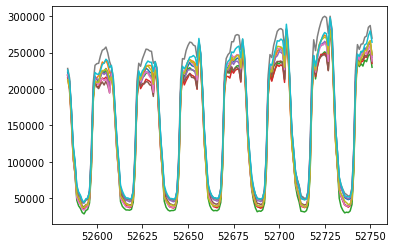

In [12]:
# plot mean of only one time series
rep_no = 1
for rep_no in range(10):
    # plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()
    # plt.xlim(20600,20700)

## plot the kde for experiments

for each datapoint in data_n, it plots kde of different repetition. number of repetition is 'max_shape'

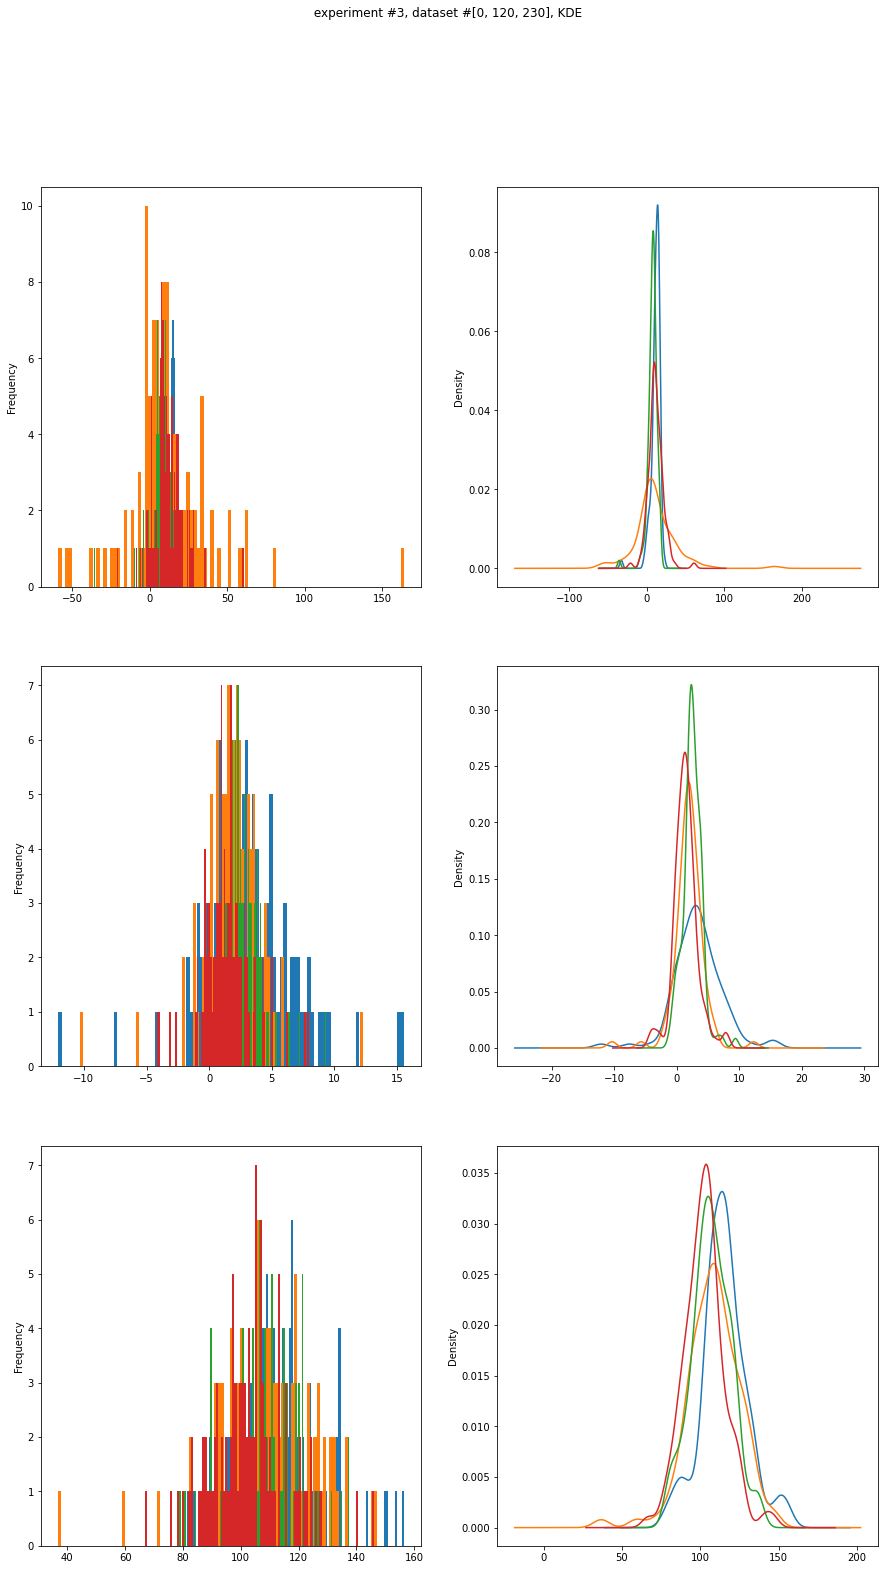

In [13]:
data_n = [0, 120, 230]
max_shape = 4 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [14]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

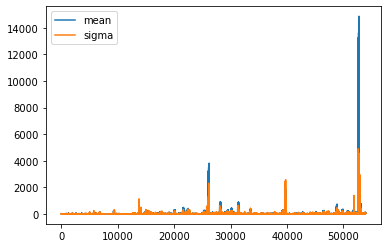

In [15]:
df_std_forecast.T.plot()

## plot samples of experimets

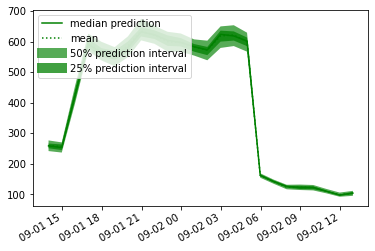

In [16]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 23000
plot_forscast_same(sample_forcast_list1, tmp_n, lim=0)

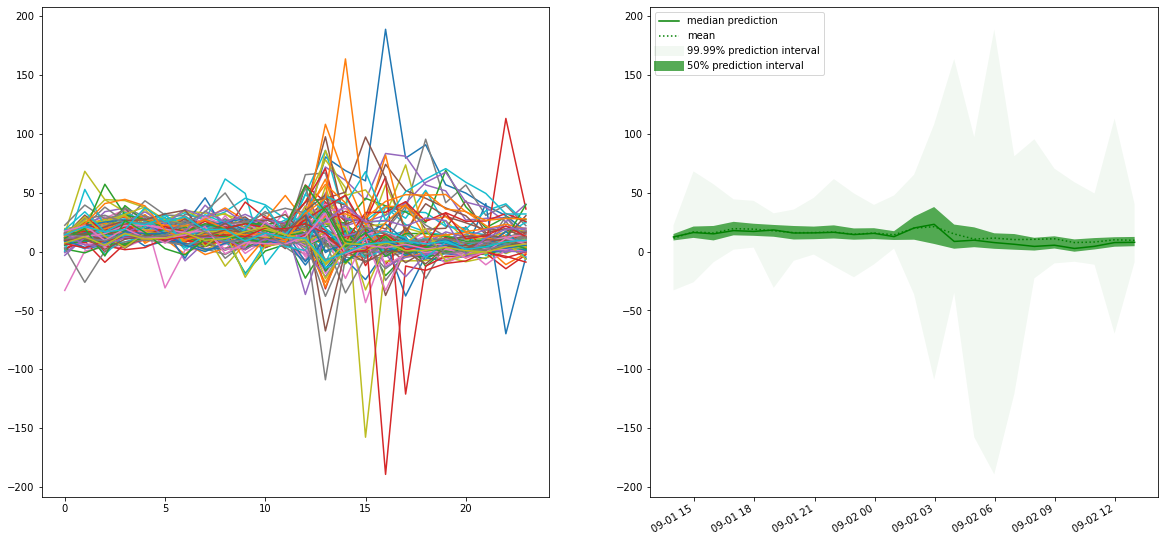

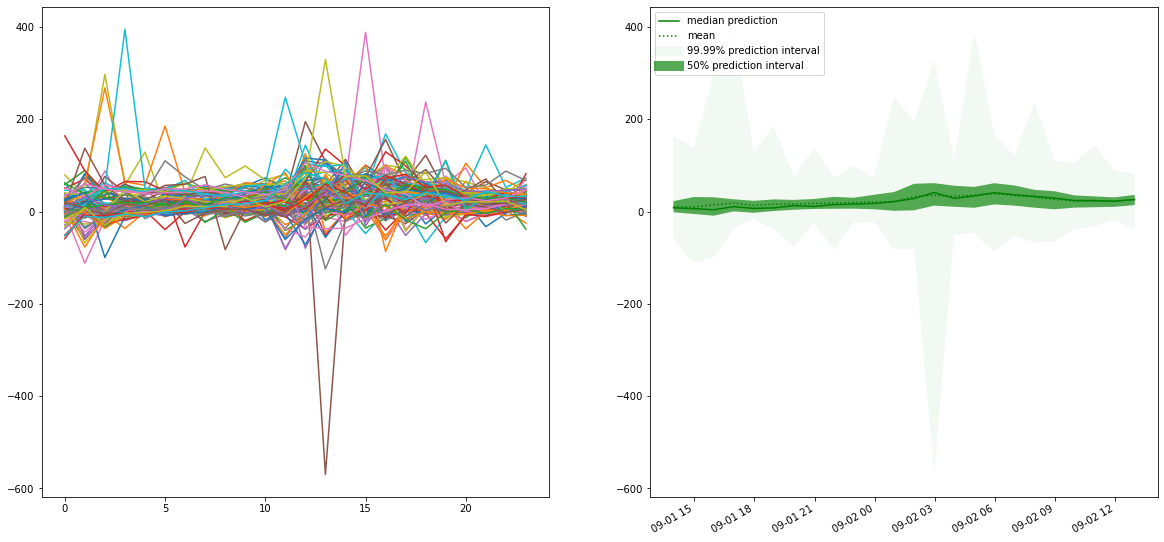

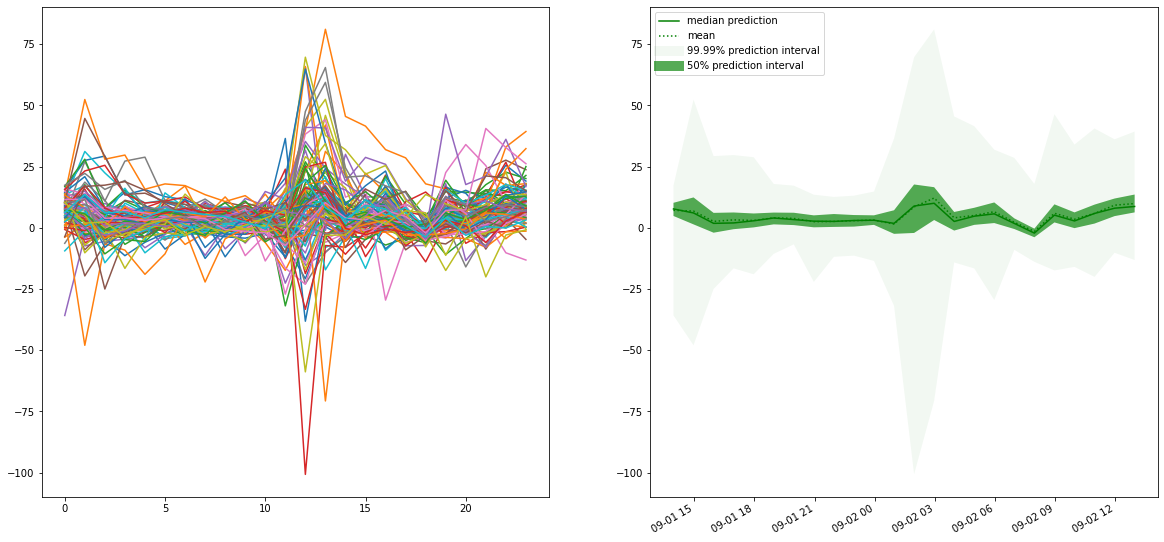

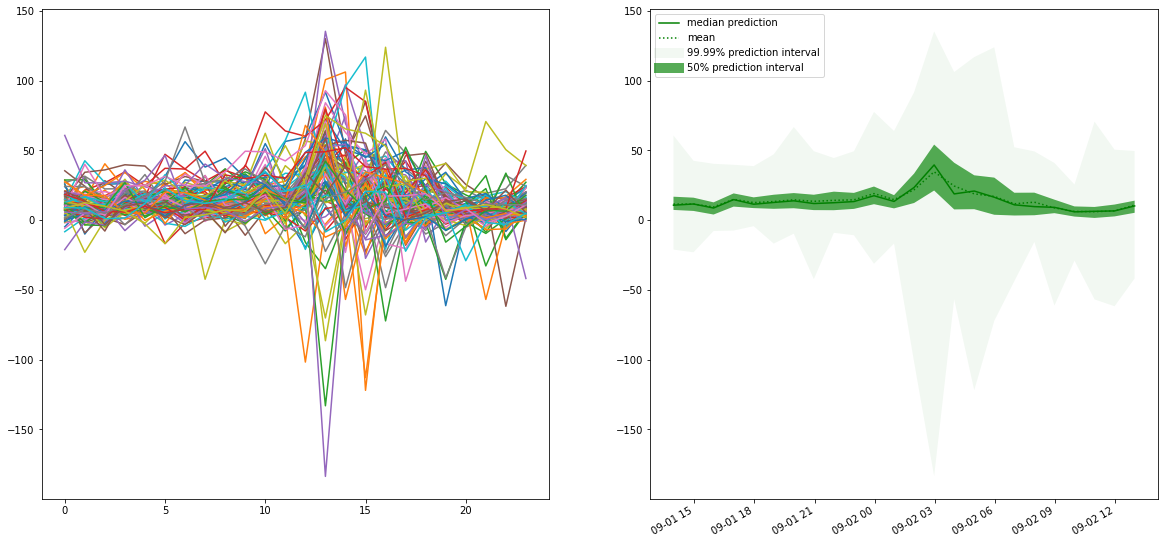

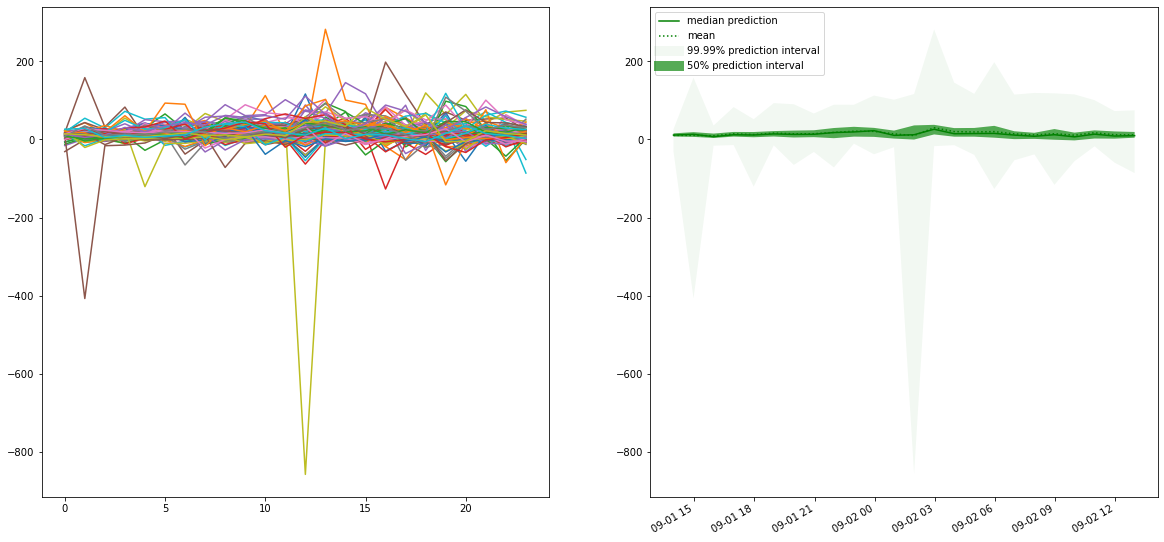

In [17]:
time_point_no = 0
rep_lim = 5
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

In [18]:
# we set the datapoint to 4
data_n_el = 4

# make some samples to visualize
exp_n = 0
sample0 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 20
sample20 = sample_forcast_list1[exp_n][data_n_el]

exp_n = 30
sample30 = sample_forcast_list1[exp_n][data_n_el]


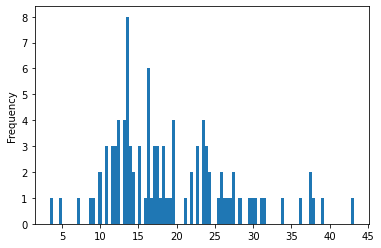

In [19]:
# plot the samples
# plt.title('sample 0')
sample0.plot.hist(bins = 100)
# plt.xlim([-40,70])

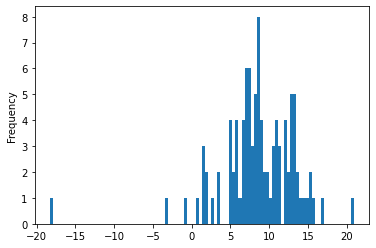

In [20]:
# plt.title('sample 20')
sample20.plot.hist(bins = 100)
# plt.xlim([-40,70])

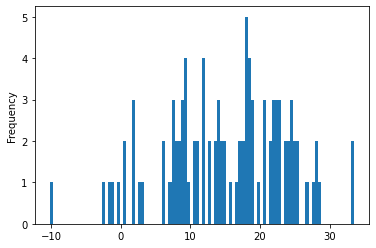

In [21]:
# plt.title('sample 30')
sample30.plot.hist(bins = 100)
# plt.xlim([-40,70])

In [22]:
# calculate the table of ks tests for each time points
data_point = 0
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [23]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,True,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
3,False,False,False,True,True,False,False,True,False,True,...,True,True,False,True,True,True,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.21120984278879015

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [25]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(0.0, 24.0)

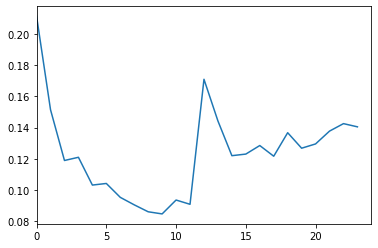

In [26]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.title(f'first day of time series #{i}')
plt.xlim(0,24)

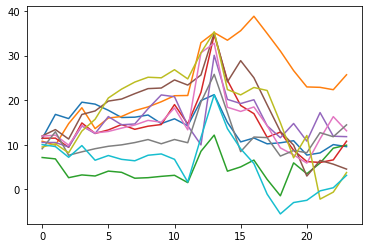

In [27]:
#time series number
i = 0

for j in range(10):
    (sorted_forcast_list1[j]['mean'].iloc[i*168: (i)*168 + 24]).plot()

# plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.xlim(0,24)

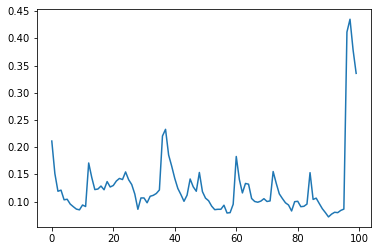

In [28]:
i = 0
plt.plot(portion_array[i*168 : (i+1)*168])
# plt.title(f'time series #{i}')

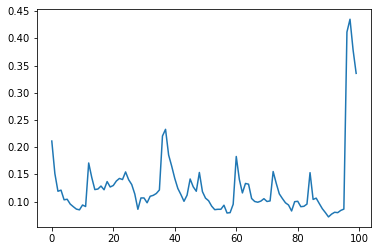

In [29]:
plt.plot(portion_array)
# plt.title('all time series')

## ks test average over horizon

In [35]:
# initialize the numpy array
train_series_number = 100
prediction_length = 24
ks_array = np.zeros((train_series_number, prediction_length))


# we want to calculate the ks test for the first prediction
# i from 0 to #ts-1:
#   j from 168*i to 168*i+24:
for i in range(train_series_number):
    for j, data_point in enumerate(range(168*i, 168*i+24)):
        ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
        ks_array[i,j] = portion_ks_table(ks_table)
    print(f'ts {i}')

ks_array

ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99


array([[0.21120984, 0.15140123, 0.1189337 , ..., 0.13773069, 0.14251538,
        0.1404648 ],
       [0.79084074, 0.74367738, 0.74401914, ..., 0.47231716, 0.52392344,
        0.54066986],
       [0.54545455, 0.49965824, 0.48051948, ..., 0.2771702 , 0.28605605,
        0.28810663],
       ...,
       [0.73889269, 0.66609706, 0.72146275, ..., 0.58544087, 0.61073137,
        0.56971975],
       [0.69958988, 0.6404648 , 0.56596036, ..., 0.50649351, 0.47573479,
        0.45146958],
       [0.6657553 , 0.66609706, 0.59090909, ..., 0.26794258, 0.29049897,
        0.33971292]])

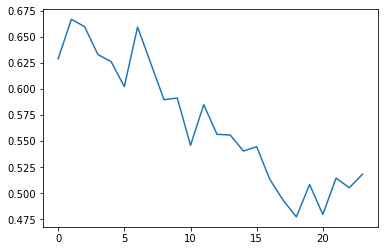

In [36]:
i = 3
plt.plot(ks_array[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4ee9f8a210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4ee9f8ac90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4ee9f7fc10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4ee9f91790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ee9f91cd0>,
 'means': []}

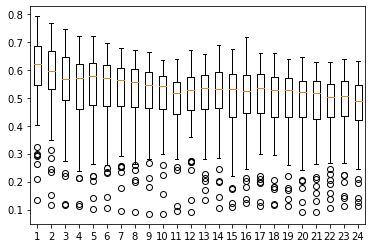

In [37]:
# plt.plot(ks_array.mean(axis=0))
plt.boxplot(ks_array)